

# Bahria University, Lahore Campus  
**Department of Computer Science**  
**Assignment 02**  
*(Spring 2025)*  

---

### **Course Information**  
- **Course:** Machine Learning  
- **Date:** 9-5-25
- **Course Code:** AIL-301  
- **Max Marks:** 5
- **Faculty’s Name:** Mr Mudassir

---

### **Student Information**  
- **Name:** Usman Ali
- **Enroll No:** 03-134221-044
- **Class:** BSCS 7A





In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, RFE
import numpy as np

In [35]:
df=pd.read_csv('/home/usmancout/Documents/University Data /7th Semester/ML/Assignments/Machine Learning/Datasets/titanic.csv')

In [36]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

/tmp/ipykernel_11294/1350131670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)


In [41]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [42]:
df.dropna(subset=['Embarked'], inplace=True)

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [45]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [47]:
df['Sex']=df['Sex'].map({'male':0, 'female':1})
df['Embarked']=df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [48]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [49]:
numerical_features=['Age', 'SibSp', 'Parch', 'Fare']
categorical_features=['Pclass', 'Sex', 'Embarked']

In [50]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [51]:
scaler=StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
print(X)

       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0    0.825209 -0.735342 -0.590495  0.431350 -0.474326 -0.500240 -0.569684
1   -1.572211  1.359911  0.643971  0.431350 -0.474326  0.788947  1.003139
2    0.825209  1.359911 -0.281878 -0.475199 -0.474326 -0.486650 -0.569684
3   -1.572211  1.359911  0.412509  0.431350 -0.474326  0.422861 -0.569684
4    0.825209 -0.735342  0.412509 -0.475199 -0.474326 -0.484133 -0.569684
..        ...       ...       ...       ...       ...       ...       ...
884 -0.373501 -0.735342 -0.204724 -0.475199 -0.474326 -0.384475 -0.569684
885 -1.572211  1.359911 -0.821957 -0.475199 -0.474326 -0.042213 -0.569684
886  0.825209  1.359911  0.003524  0.431350  2.006119 -0.174084 -0.569684
887 -1.572211 -0.735342 -0.281878 -0.475199 -0.474326 -0.042213  1.003139
888  0.825209 -0.735342  0.181046 -0.475199 -0.474326 -0.490173  2.575963

[889 rows x 7 columns]


In [125]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [126]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Centroids:", centroids)

Cluster Labels: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 

In [127]:

from sklearn.metrics import silhouette_score, davies_bouldin_score

print("KMeans Silhouette Score:", silhouette_score(X, labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X, labels))


KMeans Silhouette Score: 0.5687907819614234
KMeans Davies-Bouldin Index: 0.7015112757414095


In [119]:
from sklearn.cluster import AgglomerativeClustering


In [124]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X)

print("Agglomerative Silhouette Score:", silhouette_score(X, agglo_labels))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X, agglo_labels))

Agglomerative Silhouette Score: 0.6214865902472219
Agglomerative Davies-Bouldin Index: 0.48020749689975756


/home/usmancout/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


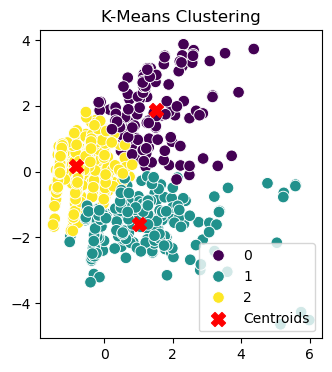

In [58]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=70)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()

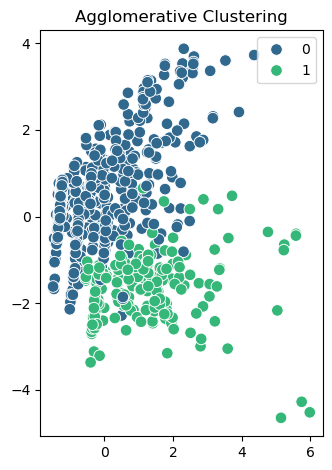

In [59]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette='viridis', s=70)
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()

In [128]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

In [129]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("KMeans Silhouette Score:", silhouette_score(X, kmeans_labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))

KMeans Silhouette Score: 0.44477657151370537
KMeans Davies-Bouldin Index: 0.7677798977826624


/home/usmancout/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


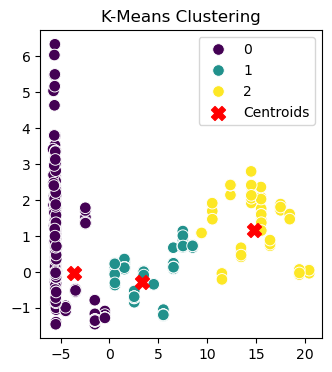

In [130]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=70)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("KMeans Silhouette Score:", silhouette_score(X, labels))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(X, labels))

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture



results = {}

best_k = 0
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_k = k
results['KMeans'] = best_score
print(f"KMeans (K={best_k}) Silhouette Score: {best_score:.4f}")

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
if len(set(dbscan_labels)) > 1:
    dbscan_score = silhouette_score(X, dbscan_labels)
    results['DBSCAN'] = dbscan_score
    print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
else:
    print("DBSCAN formed one cluster, Silhouette undefined.")

# Agglomerative Clustering
best_k_agg = 0
best_score_agg = -1
for k in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score_agg:
        best_score_agg = score
        best_k_agg = k
results['Agglomerative'] = best_score_agg
print(f"Agglomerative Clustering (K={best_k_agg}) Silhouette Score: {best_score_agg:.4f}")

#  Gaussian Mixture Models (GMM)
best_k_gmm = 0
best_score_gmm = -1
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score_gmm:
        best_score_gmm = score
        best_k_gmm = k
results['GMM'] = best_score_gmm
print(f"Gaussian Mixture Model (K={best_k_gmm}) Silhouette Score: {best_score_gmm:.4f}")

print("\nAll Silhouette Scores:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


KMeans (K=2) Silhouette Score: 0.5688
DBSCAN Silhouette Score: 0.1807
Agglomerative Clustering (K=2) Silhouette Score: 0.6215
Gaussian Mixture Model (K=4) Silhouette Score: 0.3574

All Silhouette Scores:
KMeans: 0.5688
DBSCAN: 0.1807
Agglomerative: 0.6215
GMM: 0.3574


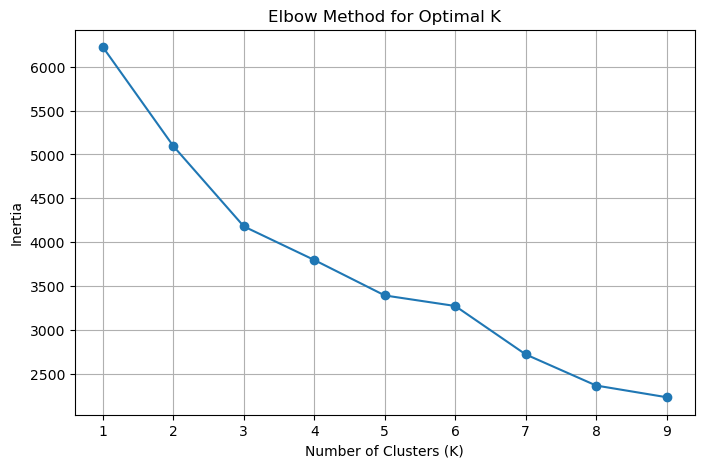

In [65]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()

[0.5687907819614234, 0.44477657151370537, 0.3998553365282022, 0.37114483455411834, 0.3570109898368685, 0.34187220315928585, 0.3813788517270526, 0.3822443485216623]


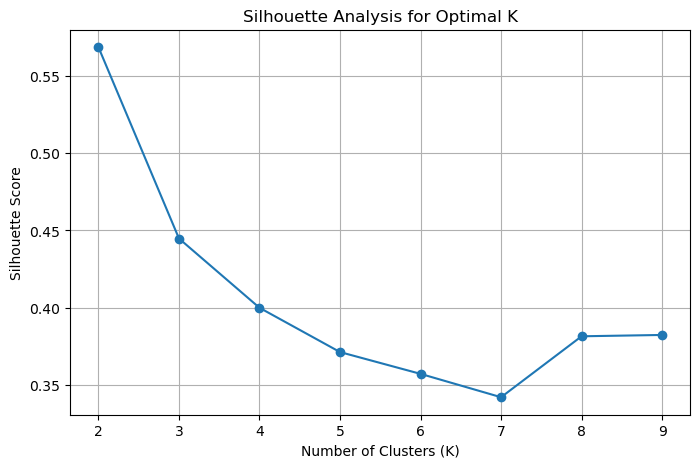

In [131]:
from sklearn.metrics import silhouette_score


silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

print (silhouette_scores)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.grid()
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
 from sklearn.datasets import make_blobs

In [68]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import KBinsDiscretizer

In [69]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()
X_bin = binarizer.fit_transform(X)

print(X_bin[:5])


[[1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0.]]


In [70]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()
X_bin_array = binarizer.fit_transform(X)


X_bin = pd.DataFrame(X_bin_array, columns=X.columns)

print("First 5 rows of binarized data:")
print(X_bin.head())

features = X_bin.columns.tolist()

selector = SelectKBest(score_func=chi2, k=3)
selector.fit(X_bin, labels)

chi_scores = pd.DataFrame({
    'Feature': features,
    'Chi2 Score': selector.scores_
})

chi_scores = chi_scores.sort_values(by='Chi2 Score', ascending=False)

print("\nChi2 scores for all features:")
print(chi_scores)

First 5 rows of binarized data:
   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0     1.0  0.0  0.0    1.0    0.0   0.0       0.0
1     0.0  1.0  1.0    1.0    0.0   1.0       1.0
2     1.0  1.0  0.0    0.0    0.0   0.0       0.0
3     0.0  1.0  1.0    1.0    0.0   1.0       0.0
4     1.0  0.0  1.0    0.0    0.0   0.0       0.0

Chi2 scores for all features:
    Feature  Chi2 Score
4     Parch  389.104069
5      Fare  299.170746
0    Pclass  165.035011
3     SibSp  119.567535
1       Sex   55.400654
2       Age   37.828751
6  Embarked   18.894317


In [71]:
top_features = chi_scores['Feature'].head(3).tolist()

print("\nTop selected features:", top_features)

X_selected = X_bin[top_features]

print("\nShape of selected features:", X_selected.shape)


Top selected features: ['Parch', 'Fare', 'Pclass']

Shape of selected features: (889, 3)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

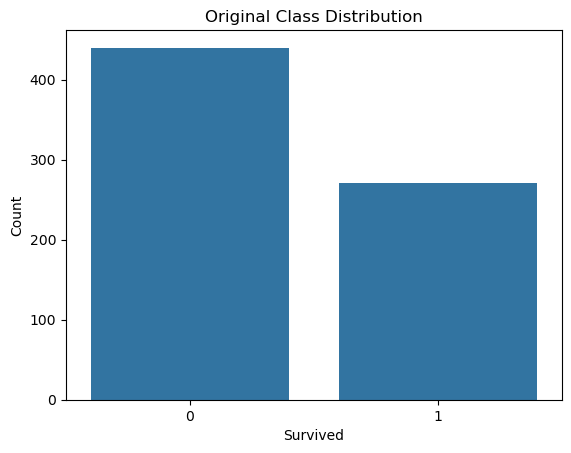

In [73]:
def plot_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()


plot_distribution(y_train, 'Original Class Distribution')

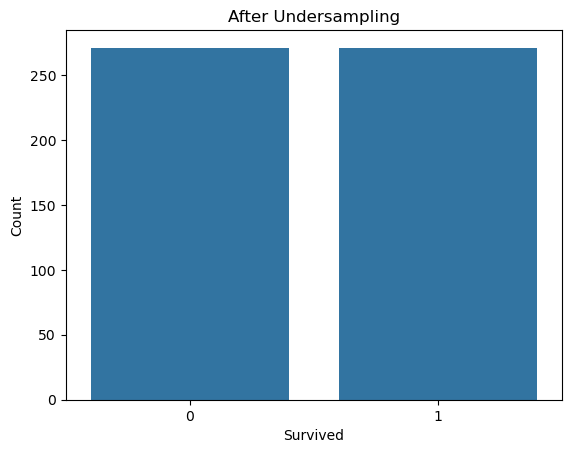

In [74]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
plot_distribution(y_under, 'After Undersampling')

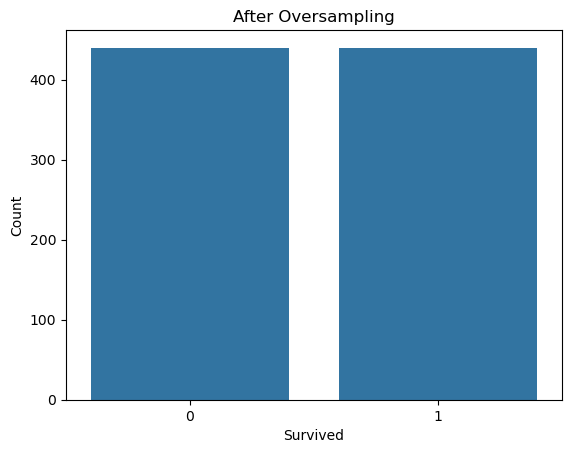

In [75]:
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
plot_distribution(y_over, "After Oversampling")

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [77]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

In [78]:
print("🔹 Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Results:
Accuracy: 0.7753
Precision: 0.6883
Recall: 0.7681
F1-Score: 0.7260

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



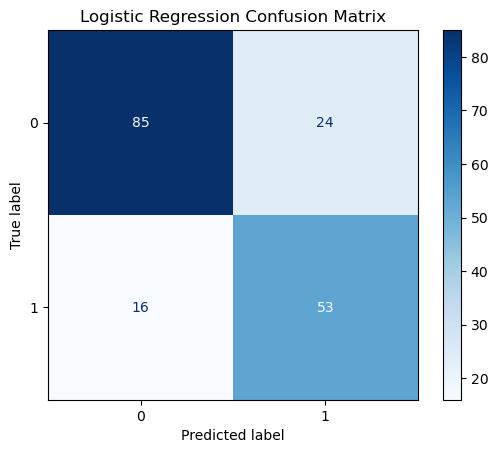

In [79]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

##K Nearest Neighbours

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [81]:
print("🔹 K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))

🔹 K-Nearest Neighbors Results:
Accuracy: 0.7865
Precision: 0.7183
Recall: 0.7391
F1-Score: 0.7286

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.72      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



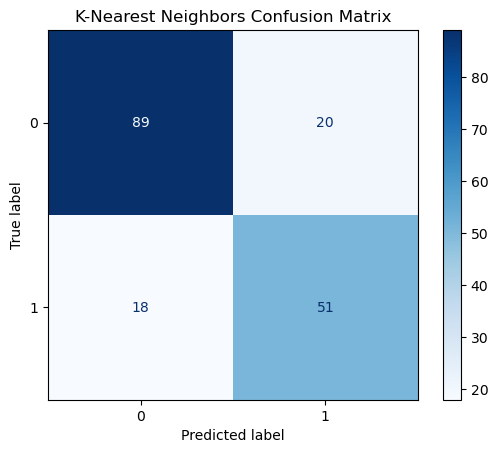

In [82]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap="Blues")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

##Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [84]:
print("🔹 Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Results:
Accuracy: 0.7584
Precision: 0.6585
Recall: 0.7826
F1-Score: 0.7152

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.66      0.78      0.72        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



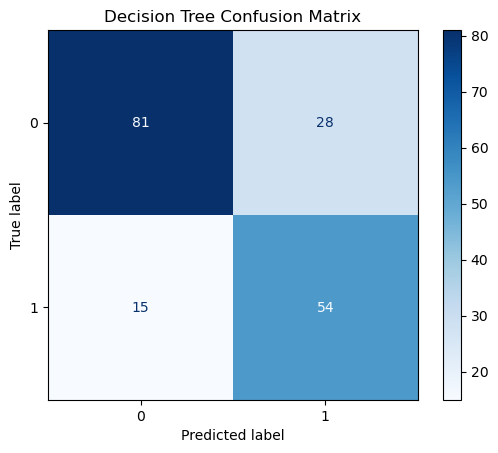

In [85]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

##Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [87]:
print("🔹 Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest Results:
Accuracy: 0.7584
Precision: 0.6711
Recall: 0.7391
F1-Score: 0.7034

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       109
           1       0.67      0.74      0.70        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



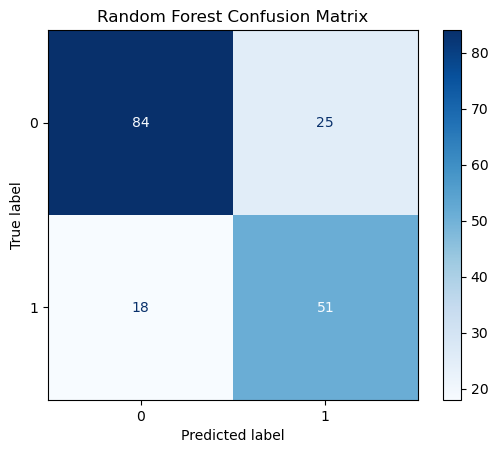

In [88]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

##XG Boost

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

/home/usmancout/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:01:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [90]:
print("🔹 XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

🔹 XGBoost Results:
Accuracy: 0.7978
Precision: 0.7260
Recall: 0.7681
F1-Score: 0.7465

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



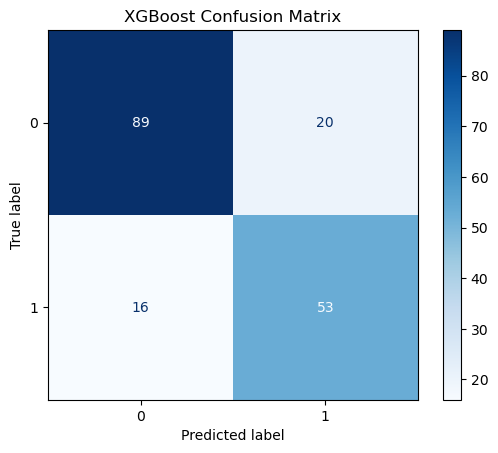

In [91]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()